# SVM with Feature Extraction (for Fashion-MNIST)

In [1]:
# import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from xgboost import XGBClassifier
import time

In [2]:
import os
os.listdir()

['.DS_Store',
 'fashion_mnist',
 'final_project_nn.ipynb',
 '.ipynb_checkpoints',
 'archive.zip',
 'final_project_svm.ipynb']

In [3]:
# read training and testing data
train = pd.read_csv('fashion_mnist/fashion-mnist_train.csv')
test = pd.read_csv('fashion_mnist/fashion-mnist_test.csv')

In [4]:
# make copy of training and testing data
df_train = train.copy()
df_test = test.copy()

In [5]:
# remove train label column
X_train= df_train.drop(['label'],axis = 1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train.shape

(60000, 784)

In [7]:
# get train labels
X_test = df_train["label"]
X_test

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [8]:
X_test.shape

(60000,)

In [9]:
# remove test label column
y_test = df_test.drop(["label"], axis = 1)
y_test.shape

(10000, 784)

In [10]:
# normalization
X_train = X_train.astype("Float32")
y_test = y_test.astype("Float32")
X_train /= 255.0
y_test /= 255.0

In [11]:
# get training and validation sets
seed = 10
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_test, test_size=0.1, random_state = seed)

In [12]:
# PCA
pca = PCA(n_components = 25, random_state = 10)
X_train_fe = pca.fit_transform(X_train)
X_test_fe = pca.transform(X_val)
y_test_fe = pca.transform(y_test)

In [ ]:
# FastICA
fica = FastICA(n_components = 100, random_state = 10)
X_train_fe = fica.fit_transform(X_train)
X_test_fe = fica.transform(X_val)
y_test_fe = fica.transform(y_test)

In [ ]:
# t-SNE
tsne = TSNE(n_components = 100, random_state = 10)
X_train_fe = tsne.fit_transform(X_train)
X_test_fe = tsne.transform(X_val)
y_test_fe = tsne.transform(y_test)

In [96]:
# TruncatedSVD
tsvd = TruncatedSVD(n_components = 100, random_state = 10)
X_train_fe = tsvd.fit_transform(X_train)
X_test_fe = tsvd.transform(X_val)
y_test_fe = tsvd.transform(y_test)

In [13]:
X_train_fe.shape

(54000, 25)

In [14]:
# convert train and test to dataframe
X_train_FE1 = pd.DataFrame(X_train_fe)
X_test_FE1 = pd.DataFrame(X_test_fe)

In [15]:
# logistic regression
start1 = time.time()

logistic = LogisticRegression(max_iter=200, solver='liblinear')
logistic.fit(X_train_FE1, y_train)

end1 = time.time()
lr_time = end1-start1

print("LR Time: {:0.2f} minute".format(lr_time/60.0))

LR Time: 0.17 minute


In [16]:
# logistic regression report
y_train_lr = logistic.predict(X_train_FE1)
y_pred_lr = logistic.predict(X_test_fe)
logistic_train = metrics.accuracy_score(y_train,y_train_lr )
logistic_accuracy = metrics.accuracy_score(y_val, y_pred_lr)

print("Train Accuracy score: {}".format(logistic_train))
print("Test Accuracy score: {}".format(logistic_accuracy))
print(metrics.classification_report(y_val, y_pred_lr))

Train Accuracy score: 0.803962962962963
Test Accuracy score: 0.8035
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       600
           1       0.95      0.93      0.94       611
           2       0.71      0.70      0.70       635
           3       0.76      0.85      0.80       613
           4       0.68      0.75      0.71       614
           5       0.88      0.89      0.89       599
           6       0.59      0.40      0.48       584
           7       0.85      0.87      0.86       578
           8       0.90      0.94      0.92       588
           9       0.92      0.93      0.92       578

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000



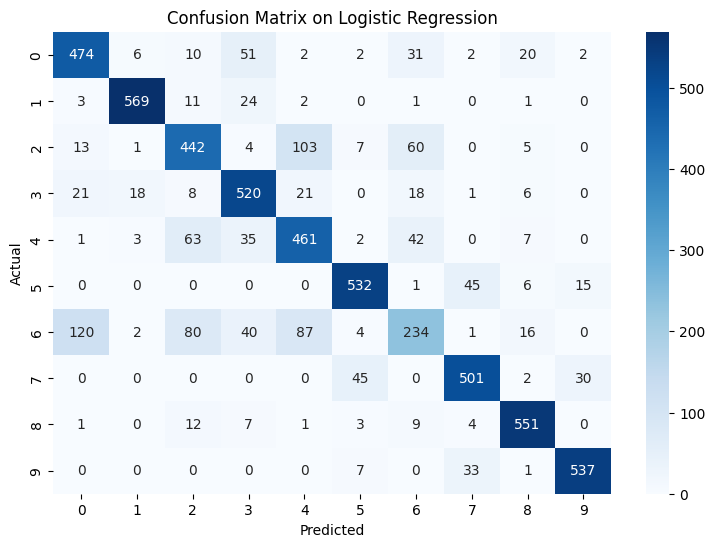

In [17]:
# logistic regression analysis
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_lr, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [22]:
# SVM
start2 = time.time()

svc = SVC(C=10,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_FE1, y_train)

end2 = time.time()
svm_time = end2-start2

print("SVC Time: {:0.2f} minute".format(svm_time/60.0))

SVC Time: 2.73 minute


In [23]:
# SVM report
y_train_svc = svc.predict(X_train_FE1)
y_pred_svc = svc.predict(X_test_fe)
svc_train = metrics.accuracy_score(y_train,y_train_svc)
svc_accuracy = metrics.accuracy_score(y_val, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train))
print("Test Accuracy score: {}".format(svc_accuracy))
print(metrics.classification_report(y_val, y_pred_svc))

Train Accuracy score: 0.9384444444444444
Test Accuracy score: 0.8946666666666667
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       600
           1       0.99      0.97      0.98       611
           2       0.84      0.84      0.84       635
           3       0.89      0.90      0.89       613
           4       0.82      0.86      0.84       614
           5       0.97      0.96      0.97       599
           6       0.76      0.66      0.71       584
           7       0.93      0.96      0.94       578
           8       0.97      0.98      0.97       588
           9       0.97      0.96      0.96       578

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



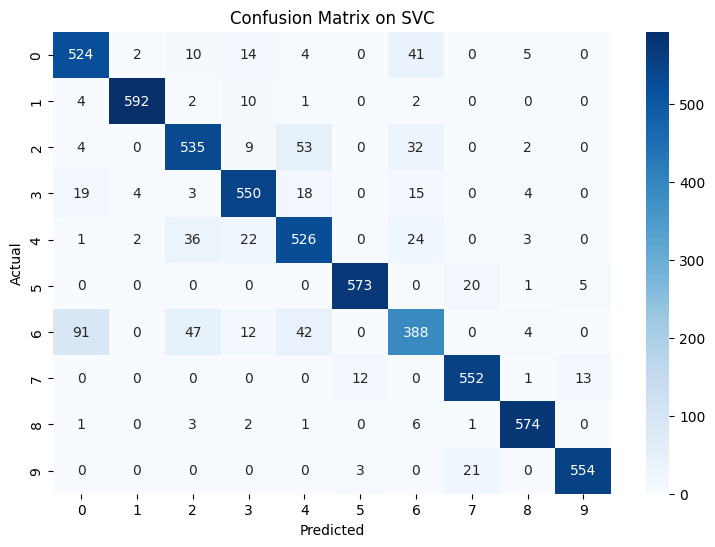

In [24]:
# SVM analysis
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svc, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [25]:
# model comparison
Train_Accuracy = [logistic_train,svc_train]
Test_Accuracy = [logistic_accuracy,svc_accuracy]
data1 = {
    'Algorithm': ['Logistic Regression','SVC'],
    'Train Accuracy':Train_Accuracy,
    'Test Accuracy':Test_Accuracy
}

df1 = pd.DataFrame(data1)

In [26]:
df1

,Algorithm,Train Accuracy,Test Accuracy
0,Logistic Regression,0.803963,0.803500
1,SVC,0.938444,0.894667
